In [38]:
import geopandas as gpd

<Axes: >

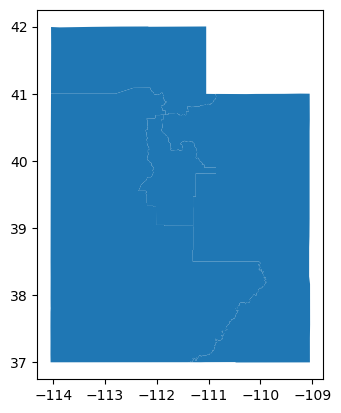

In [39]:
gdf = gpd.read_file("clean_data/renamed_final_data/utah_simplified_district_data.geojson")
gdf.plot()

In [40]:
# Apply a simplification to each geometry to alter the shape slightly
gdf['geometry'] = gdf['geometry'].simplify(tolerance=0.01, preserve_topology=True)

<Axes: >

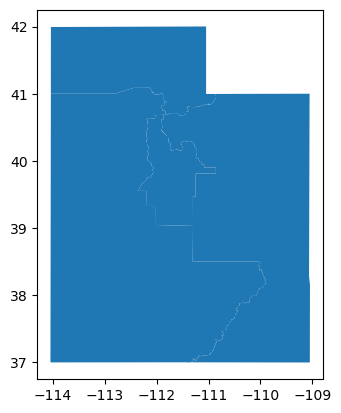

In [41]:
gdf.plot()

In [42]:
# Check the current CRS
print(gdf.crs)  # Example output: {'init': 'epsg:4326'}

# Re-project to a projected CRS, such as EPSG:3857
gdf = gdf.to_crs(epsg=3857)

EPSG:4326


In [43]:
# Apply a small buffer to change the shape of the boundaries slightly
gdf['geometry'] = gdf['geometry'].buffer(10000)  # Adjust value as needed

<Axes: >

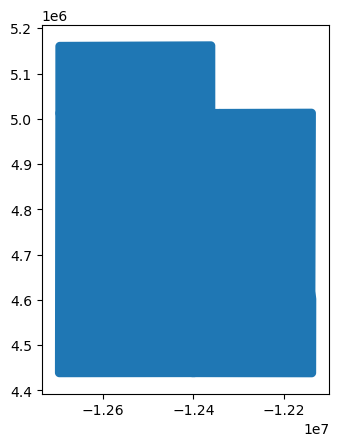

In [44]:
gdf.plot()

In [45]:
# Re-project back to the original CRS if needed
gdf = gdf.to_crs(epsg=4326)

<Axes: >

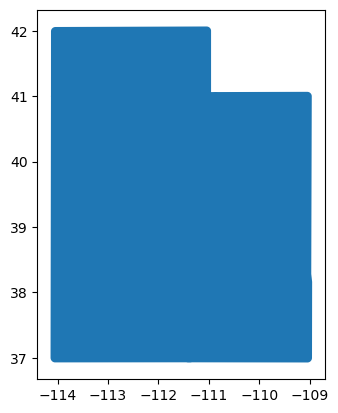

In [46]:
gdf.plot()

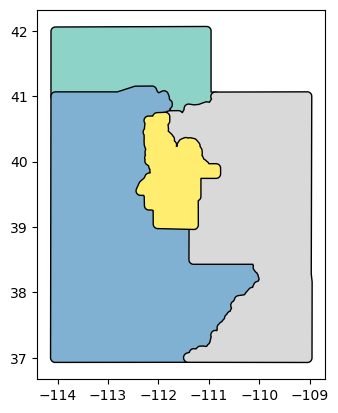

In [47]:
import matplotlib.pyplot as plt

# Plot to visualize the modified boundaries
gdf.plot(edgecolor='black', cmap='Set3')
plt.show()

In [49]:
from shapely.ops import unary_union

# Combine all geometries to ensure shared boundaries
combined = unary_union(gdf['geometry'])

# Intersect each district with the combined geometry to enforce connectivity
gdf['geometry'] = gdf['geometry'].intersection(combined)

In [51]:
gdf.to_file("./clean_data/smd_for_utah/smd_utah_example2.geojson", driver="GeoJSON")